In [1]:
#
# libraries
#
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#

In [2]:
#
# utility function for plotting histograms in a grid
#
def plot_histogram_grid(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize = (11, 11))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
#
# for some variables there are relatively few unique values, so we'll
# adjust the histogram appearance accordingly to avoid "gaps" in the plots
#    
        if len(np.unique(df[var_name])) <= bins:
          use_bins = len(np.unique(df[var_name]))
        else:
          use_bins = bins
#      
        df[var_name].hist(bins = use_bins, ax = ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

In [3]:
#
# load and prepare data
#
weather_data = pd.read_csv('Datasets\\austin_weather.csv')
#
# drop the Date column as we will consider this a classification problem
#
weather_data.drop(columns = ['Date'], inplace = True)
#
# replace the ' ' with 'None'
#
weather_data['Events'] = ['None' 
                          if weather_data['Events'][i] is ' '
                         else weather_data['Events'][i]
                         for i in range(weather_data.shape[0])]
#
weather_data.describe().T
#

,count,mean,std,min,25%,50%,75%,max
TempHighF,1319.0,80.862775,14.766523,32.0,72.0,83.0,92.0,107.0
TempAvgF,1319.0,70.642911,14.045904,29.0,62.0,73.0,83.0,93.0
TempLowF,1319.0,59.902957,14.190648,19.0,49.0,63.0,73.0,81.0


In [4]:
#
# it appears some of our data were read as strings
# this is caused by the use of - for missing or negligible, and T for 'trace' in the data
# we can replace those and convert to float
#
weather_data.iloc[:, :-1] = \
    weather_data.iloc[:, :-1].replace(['-', 'T'], 
                                      [np.nan, 0]).astype(float)
print(weather_data.loc[weather_data.isna().any(axis = 1), :].index)
#

Int64Index([174, 175, 176, 177, 596, 597, 598, 638, 639, 741, 742, 953, 1001,
            1107],
           dtype='int64')


In [5]:
#
# there aren't may rows with missing values now
# let's drop them then we are ready for scaling
#
weather_data.dropna(axis = 0, inplace = True)
#
# now inspect the results before scaling
#
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(weather_data.describe().T)
#

                             count  mean   std   min   25%   50%   75%    max
TempHighF                  1305.00 80.79 14.71 32.00 72.00 83.00 92.00 107.00
TempAvgF                   1305.00 70.56 14.01 29.00 62.00 73.00 83.00  93.00
TempLowF                   1305.00 59.82 14.19 19.00 49.00 62.00 73.00  81.00
DewPointHighF              1305.00 61.52 13.58 13.00 53.00 66.00 73.00  80.00
DewPointAvgF               1305.00 56.64 14.86  8.00 46.00 61.00 69.00  76.00
DewPointLowF               1305.00 50.94 16.19  2.00 38.00 56.00 65.00  75.00
HumidityHighPercent        1305.00 87.83 11.05 37.00 85.00 90.00 94.00 100.00
HumidityAvgPercent         1305.00 66.66 12.50 27.00 59.00 67.00 74.00  97.00
HumidityLowPercent         1305.00 44.98 17.01 10.00 33.00 44.00 55.00  93.00
SeaLevelPressureHighInches 1305.00 30.11  0.18 29.63 29.99 30.08 30.21  30.83
SeaLevelPressureAvgInches  1305.00 30.02  0.17 29.55 29.91 30.00 30.10  30.74
SeaLevelPressureLowInches  1305.00 29.93  0.17 29.41 29.82 29.91

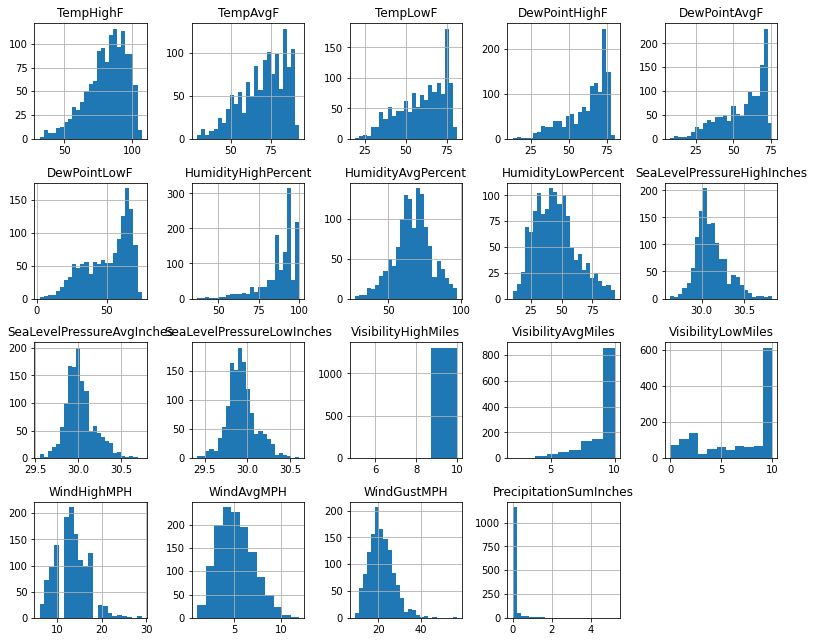

In [6]:
#
# visualize the variable distributions before scaling
plot_histogram_grid(df = weather_data.iloc[:, :-1], 
                    variables = weather_data.iloc[:, :-1].columns, 
                    n_rows = 5, 
                    n_cols = 5,
                    bins = 25)
#

In [7]:
#
# split the data before scaling
#
train_X, val_X, train_y, val_y = \
    train_test_split(weather_data.drop(columns = 'Events'), 
                     weather_data['Events'],
                     train_size = 0.7,
                     test_size = 0.2,
                     random_state = 42)

In [8]:
#
# scale all the numeric columns using StandardScaler
#
# create an instance of the scaler
#
scaler = StandardScaler()
#
# fit the scaler to our data
#
scaler = scaler.fit(train_X)
scaled_train = pd.DataFrame(scaler.transform(train_X))
scaled_train.columns = weather_data.columns[:-1]
scaled_val = pd.DataFrame(scaler.transform(val_X))
scaled_val.columns = weather_data.columns[:-1]
scaled_train.head()
#

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0.83,0.81,0.78,0.99,0.97,0.81,0.57,0.11,-0.23,0.39,0.23,0.06,0.05,-0.10,-1.31,1.35,0.45,1.63,-0.16
1,0.76,0.89,0.92,0.99,1.04,1.18,0.29,0.43,0.42,-0.28,-0.24,-0.17,0.05,-0.10,-1.58,-0.39,-0.98,0.09,0.08
2,-1.76,-1.76,-1.69,-2.24,-1.93,-1.73,-1.08,-1.01,-0.76,2.14,2.17,2.00,0.05,0.57,0.86,-1.54,-1.93,-1.61,-0.26
3,0.35,0.17,0.01,-0.18,-0.11,-0.25,-0.35,-0.69,-0.76,-0.51,-0.30,-0.17,0.05,0.57,0.86,1.06,1.88,0.78,-0.26
4,-0.80,-0.62,-0.35,-0.26,-0.38,-0.18,0.20,0.43,0.48,1.52,1.76,1.53,0.05,0.57,0.58,-0.10,0.45,-0.25,-0.26
